In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.patches as mpatches

In [66]:
# Load dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))  # use uploaded CSV
df.head()


# Features and target
features = ["Distance_Downstream", "Day", "Flow_Rate", "Temperature", "pH"]
X = df[features]
y = df["is_safe"]
df.head()


Saving ML_Water_Quality_Dataset.csv to ML_Water_Quality_Dataset (1).csv


,Distance_Downstream,Day,Nitrate_Concentration,Flow_Rate,Temperature,pH,is_safe
0,0.000000,1,8.248357,1.725886,18.415693,7.152303,0
1,20.202020,1,7.655343,1.733828,18.881455,7.090201,0
2,40.404040,1,7.316576,1.828606,17.860140,6.980282,0
3,60.606061,1,7.457478,1.599683,17.229390,6.983901,0
4,80.808081,1,6.621376,1.838621,17.637837,6.911993,0


In [67]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [69]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.97      0.98       105

    accuracy                           0.97       150
   macro avg       0.96      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [70]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.alpha": 0.3,
    "axes.grid": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "figure.dpi": 120,
    "legend.frameon": False
})

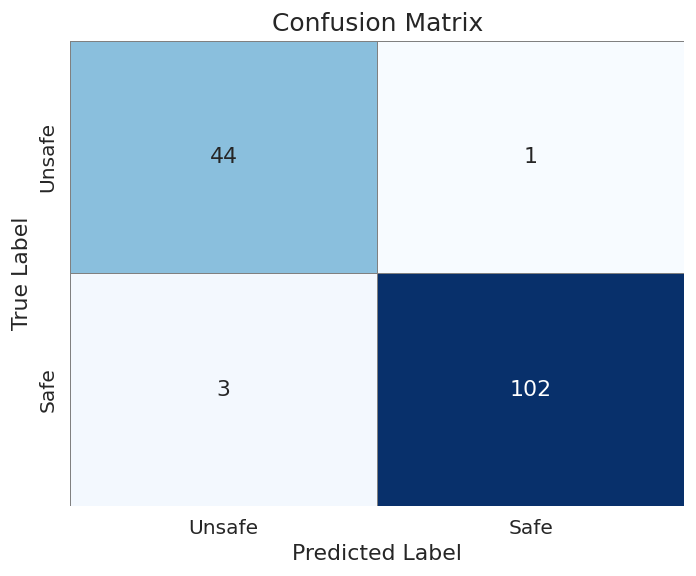

In [71]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"],
            cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


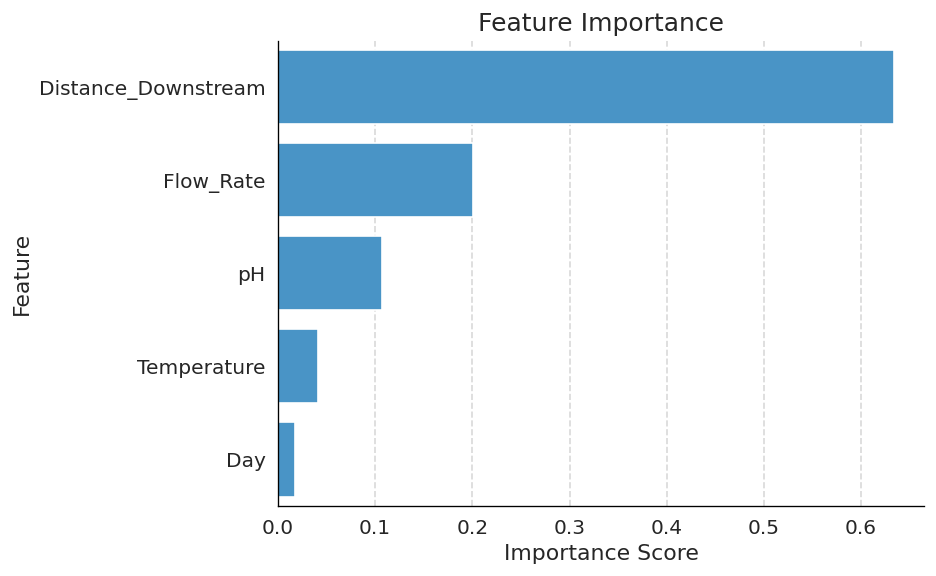

In [72]:
# 2. Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances, x="Importance", y="Feature", color="#3498db")
plt.title("Feature Importance", fontsize=15)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

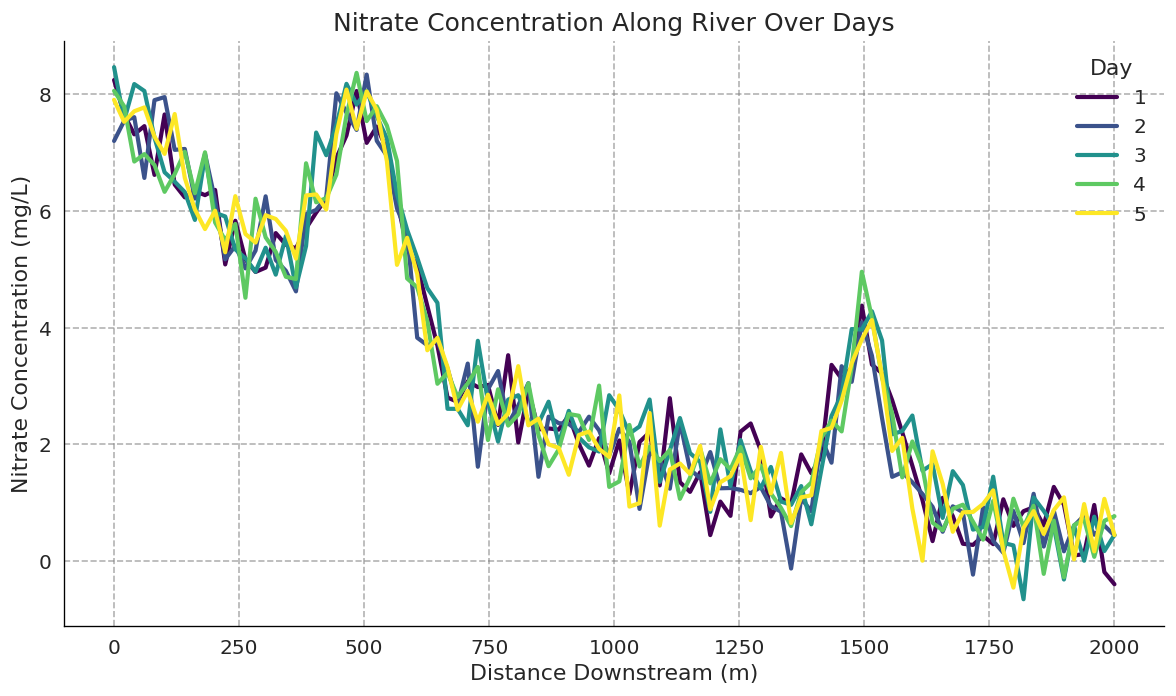

In [73]:
# 3. Nitrate Concentration Over Distance and Day
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Distance_Downstream", y="Nitrate_Concentration",
             hue="Day", palette="viridis", linewidth=2.5)
plt.title("Nitrate Concentration Along River Over Days", fontsize=15)
plt.xlabel("Distance Downstream (m)")
plt.ylabel("Nitrate Concentration (mg/L)")
plt.legend(title="Day", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

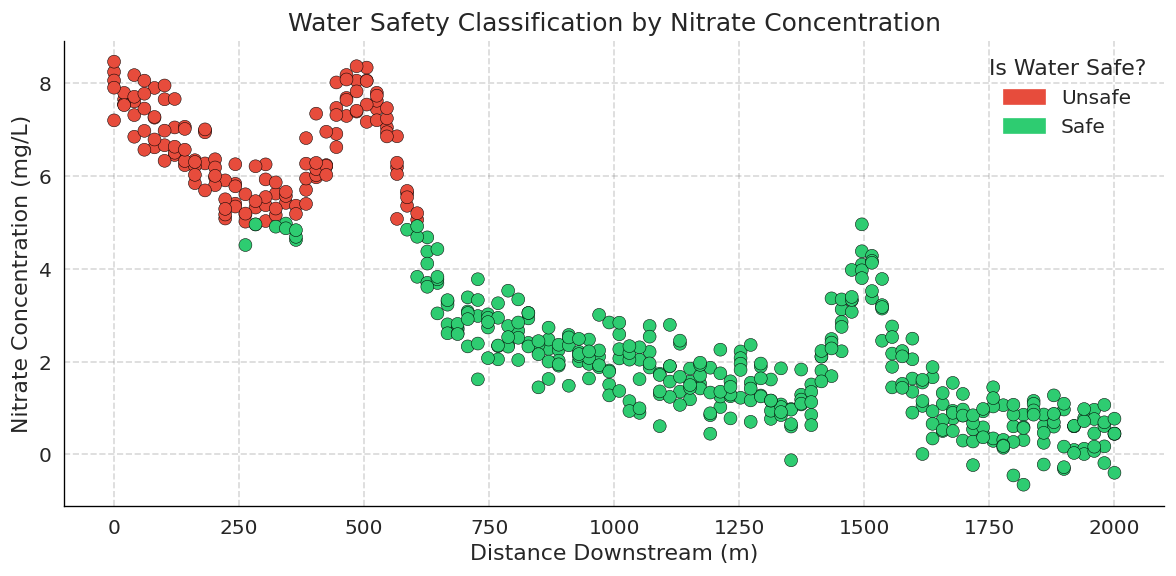

In [74]:
# 4. Safe vs Unsafe Scatter Plot with Custom Legend
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x="Distance_Downstream",
    y="Nitrate_Concentration",
    hue="is_safe",
    palette={0: "#e74c3c", 1: "#2ecc71"},
    s=60,
    edgecolor="black",
    linewidth=0.3,
    legend=False  # disable seaborn’s auto-legend
)

plt.title("Water Safety Classification by Nitrate Concentration", fontsize=15)
plt.xlabel("Distance Downstream (m)")
plt.ylabel("Nitrate Concentration (mg/L)")

# Manual legend
legend_handles = [
    mpatches.Patch(color="#e74c3c", label="Unsafe"),
    mpatches.Patch(color="#2ecc71", label="Safe")
]
plt.legend(handles=legend_handles, title="Is Water Safe?", loc="upper right")

plt.tight_layout()
plt.show()
